# 1.Import necessary packages

In [145]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



# 2.Load the file

In [146]:
income_df=pd.read_csv("kaggle/Inc_Exp_Data.csv")

In [147]:
income_df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


# 3.Analyze the data

In [148]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


In [149]:
income_df.shape

(50, 7)

In [150]:
income_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Mthly_HH_Income,50.0,41558.00,26097.908979,5000.0,23550.0,35000.0,50375.0,100000.0
Mthly_HH_Expense,50.0,18818.00,12090.216824,2000.0,10000.0,15500.0,25000.0,50000.0
No_of_Fly_Members,50.0,4.06,1.517382,1.0,3.0,4.0,5.0,7.0
Emi_or_Rent_Amt,50.0,3060.00,6241.434948,0.0,0.0,0.0,3500.0,35000.0
Annual_HH_Income,50.0,490019.04,320135.792123,64200.0,258750.0,447420.0,594720.0,1404000.0
No_of_Earning_Members,50.0,1.46,0.734291,1.0,1.0,1.0,2.0,4.0


In [151]:
income_df.isna().any()

,0
Mthly_HH_Income,False
Mthly_HH_Expense,False
No_of_Fly_Members,False
Emi_or_Rent_Amt,False
Annual_HH_Income,False
Highest_Qualified_Member,False
No_of_Earning_Members,False


No null values in the dataset

# 4.What is the Mean Expense of a Household?

In [152]:
income_df["Mthly_HH_Expense"].mean()

np.float64(18818.0)

# 5.What is the Median Household Expense?

In [153]:
income_df["Mthly_HH_Expense"].median()

15500.0

# 6.What is the Monthly Expense for most of the Households?


In [154]:
mth_exp_tmp = pd.crosstab(index=income_df["Mthly_HH_Expense"], columns="count")
mth_exp_tmp.reset_index(inplace=True)
mth_exp_tmp[mth_exp_tmp['count'] == income_df.Mthly_HH_Expense.value_counts().max()]

col_0,Mthly_HH_Expense,count
18,25000,8


In [155]:
income_df["Highest_Qualified_Member"].value_counts()

,count
Highest_Qualified_Member,
Graduate,19
Under-Graduate,10
Professional,10
Post-Graduate,6
Illiterate,5


# 7.Plot the Histogram to count the Highest qualified member


Value Counts for Highest_Qualified_Member:
Highest_Qualified_Member
Graduate          19
Under-Graduate    10
Professional      10
Post-Graduate      6
Illiterate         5
Name: count, dtype: int64


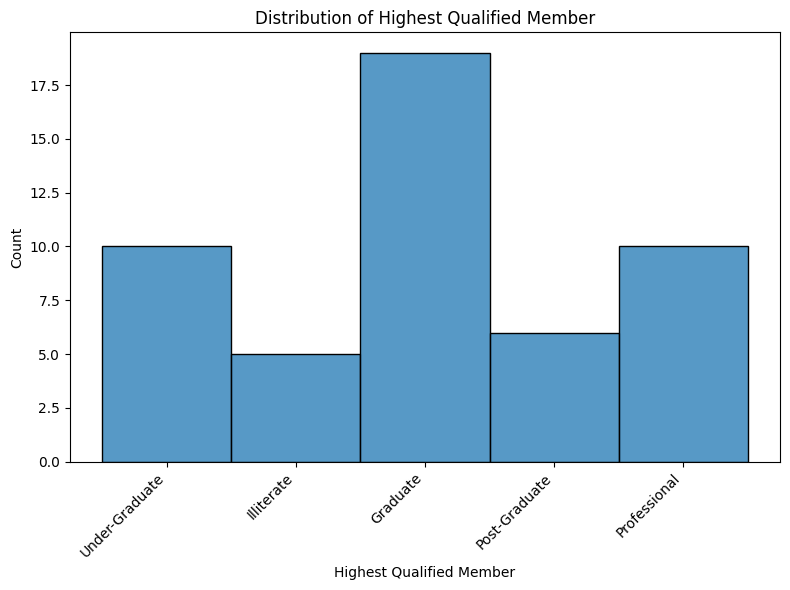

In [171]:
#income_df["Highest_Qualified_Member"].value_counts().plot(kind="bar")
#income_df["Highest_Qualified_Member"].value_counts()
# income_df["Highest_Qualified_Member"].value_counts().plot(kind="hist", bins=5)
# plt.xlabel("Highest qualified member")
# plt.ylabel("Frequency")
# plt.show()

# Re-create a sample DataFrame with duplicate values to ensure counts are > 1
data = {'Highest_Qualified_Member':income_df["Highest_Qualified_Member"]}
#print(income_df["Highest_Qualified_Member"])
income_df1 = pd.DataFrame(data)

# Print the value counts to verify the data
print("Value Counts for Highest_Qualified_Member:")
print(income_df1["Highest_Qualified_Member"].value_counts())

# Plot using seaborn.histplot
plt.figure(figsize=(8, 6))
#sns.histplot(data=income_df, x="Highest_Qualified_Member", stat="count", shrink=0.8)
sns.histplot(data=income_df1, x="Highest_Qualified_Member")

plt.xlabel("Highest Qualified Member")
plt.ylabel("Count")
plt.title("Distribution of Highest Qualified Member")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# 8.Calculate IQR(difference between 75% and 25% quartile)

    Mthly_HH_Income  Mthly_HH_Expense  No_of_Fly_Members  Emi_or_Rent_Amt  \
0              5000              8000                  3             2000   
1              6000              7000                  2             3000   
2             10000              4500                  2                0   
3             10000              2000                  1                0   
4             12500             12000                  2             3000   
5             14000              8000                  2                0   
6             15000             16000                  3            35000   
7             18000             20000                  5             8000   
8             19000              9000                  2                0   
9             20000              9000                  4                0   
10            20000             18000                  4             8000   
11            22000             25000                  6            12000   

np.float64(15000.0)

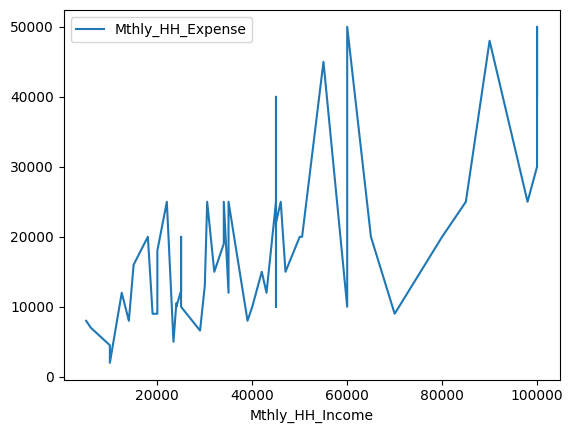

In [157]:
print(income_df)

income_df.plot(x="Mthly_HH_Income", y="Mthly_HH_Expense")
IQR=income_df["Mthly_HH_Expense"].quantile(0.75)-income_df["Mthly_HH_Expense"].quantile(0.25)
IQR

# 9.Calculate Standard Deviation for first 4 columns.

In [159]:
pd.DataFrame(income_df.iloc[:,0:5].std().to_frame()).T

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income
0,26097.908979,12090.216824,1.517382,6241.434948,320135.792123


# 10.Calculate Variance for first 3 columns.


In [160]:
pd.DataFrame(income_df.iloc[:,0:4].var().to_frame()).T

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt
0,6.811009e+08,1.461733e+08,2.302449,3.895551e+07


# 11.Calculate the count of Highest qualified member.


In [161]:
income_df["Highest_Qualified_Member"].value_counts().to_frame().T

Highest_Qualified_Member,Graduate,Under-Graduate,Professional,Post-Graduate,Illiterate
count,19,10,10,6,5


# 11.Calculate the count of Highest qualified member.

In [162]:
income_df["Highest_Qualified_Member"].value_counts().to_frame().T

Highest_Qualified_Member,Graduate,Under-Graduate,Professional,Post-Graduate,Illiterate
count,19,10,10,6,5


# 12.Plot the Histogram to count the No_of_Earning_Members


Value Counts for No_of_Earning_Members:
No_of_Earning_Members
1    33
2    12
3     4
4     1
Name: count, dtype: int64


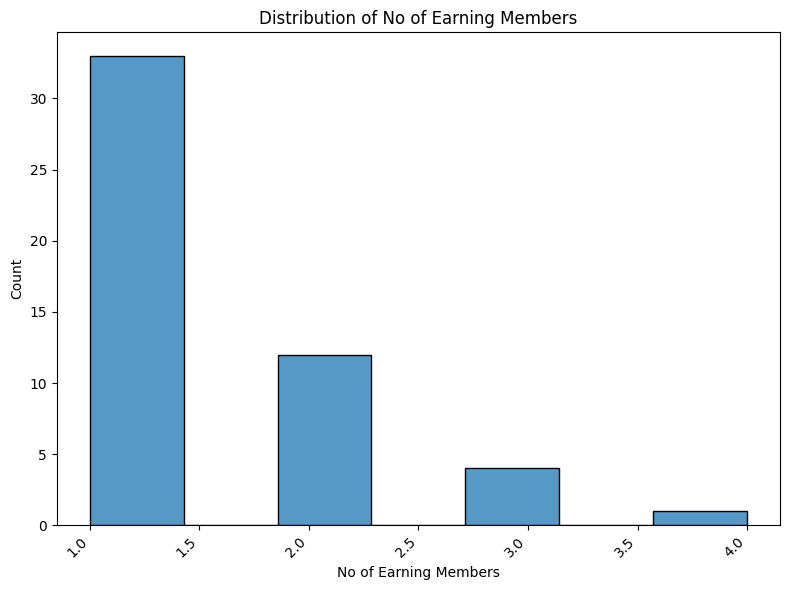

In [176]:
#income_df["No_of_Earning_Members"].value_counts().plot(kind="hist")

data = {'No_of_Earning_Members':income_df["No_of_Earning_Members"]}
#print(income_df["Highest_Qualified_Member"])
income_df1 = pd.DataFrame(data)

# Print the value counts to verify the data
print("Value Counts for No_of_Earning_Members:")
print(income_df1["No_of_Earning_Members"].value_counts())

# Plot using seaborn.histplot
plt.figure(figsize=(8, 6))
#sns.histplot(data=income_df, x="Highest_Qualified_Member", stat="count", shrink=0.8)
sns.histplot(data=income_df1, x="No_of_Earning_Members",stat="count", shrink=1.0)

plt.xlabel("No of Earning Members")
plt.ylabel("Count")
plt.title("Distribution of No of Earning Members")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 13.Suppose you have option to invest in Stock A or Stock B. The stocks • have different expected returns and standard deviations. The expected return of Stock A is 15% and Stock B is 10%. Standard Deviation of the returns of these stocks is 10% and 5% respectively.

Which is better investment?

In [168]:
#Here we need to calculate the coeff of variation

Coeff_of_var_StockA=10/15
print(Coeff_of_var_StockA)
Coeff_of_var_StockB=5/10
print(Coeff_of_var_StockB)

0.6666666666666666
0.5
